# Uniones de tablas con Pandas

El objetivo de las uniones de tablas usando Pandas es enriquecer la información disponible en una tabla a partir de otra información disponible en otra que está relacionada con la primera.

Existen tres herramientas para lograr esto: `concat` `merge` y `join`.


# Concat

In [1]:
import pandas as pd
import numpy as np

El método de la clase pandas `concat` permite unir tablas horizontal y verticalmente.

La única forma de relacionar las filas o las columnas de ambas tablas es el nombre que tengan.

Si el nombre de la fila en la primera tabla coincide con el de la segunda tabla y la unión es horizontal,  los valores de la segunda tabla se añadirán horizontalmente a los de la primera.

In [2]:
tabla1 = pd.DataFrame(np.ones((5,5)), columns = ["Col1", "Col2", "Col3", "Col4", "Col5"], index = ['a', 'b', 'c', 'd', 'e'])
tabla1

,Col1,Col2,Col3,Col4,Col5
a,1.0,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0,1.0
e,1.0,1.0,1.0,1.0,1.0


In [3]:
tabla2 = pd.DataFrame(2*np.ones((5,5)), columns = ["Col1", "Col2", "Col3", "Col5", "Col6"], index = ['a', 'b', 'c', 'e', 'f'])
tabla2

,Col1,Col2,Col3,Col5,Col6
a,2.0,2.0,2.0,2.0,2.0
b,2.0,2.0,2.0,2.0,2.0
c,2.0,2.0,2.0,2.0,2.0
e,2.0,2.0,2.0,2.0,2.0
f,2.0,2.0,2.0,2.0,2.0


## `concat` vertical

El comportamiento predetermonado de concat es realizar el concatenado de manera vertical ya que es lo más habitual cuando unimos dos tablas relacionadas.

Cuando ya tenemos datos pero eventualmente recibimos nuevos registros de las mismas variables.

In [4]:
# pd.concat([tabla1, tabla2]).reset_index().drop(columns="index")
pd.concat([tabla1, tabla2])
# pd.concat([tabla1, tabla2], verify_integrity=True)

,Col1,Col2,Col3,Col4,Col5,Col6
a,1.0,1.0,1.0,1.0,1.0,NaN
b,1.0,1.0,1.0,1.0,1.0,NaN
c,1.0,1.0,1.0,1.0,1.0,NaN
d,1.0,1.0,1.0,1.0,1.0,NaN
e,1.0,1.0,1.0,1.0,1.0,NaN
a,2.0,2.0,2.0,NaN,2.0,2.0
b,2.0,2.0,2.0,NaN,2.0,2.0
c,2.0,2.0,2.0,NaN,2.0,2.0
e,2.0,2.0,2.0,NaN,2.0,2.0
f,2.0,2.0,2.0,NaN,2.0,2.0


Si en los nuevos datos aparece una nueva característica que no existía en los viejos tendremos que rellenar la tabla1 con valores perdidos. Si alguna característica ya no está en los datos nuevos, dejaremos el espacio en la tabla2 con valores perdidos.

Los identificadores de las filas pueden repetirse.

Para 'seguir la pista' de las filas repetidas, puedo crear un índice de filas nuevo en el que tenga constancia del origen del dato.

In [5]:
pd.concat([tabla1, tabla2], keys=['tabla1', 'tabla2'])

Col1  Col2  Col3  Col4  Col5  Col6
tabla1 a   1.0   1.0   1.0   1.0   1.0   NaN
       b   1.0   1.0   1.0   1.0   1.0   NaN
       c   1.0   1.0   1.0   1.0   1.0   NaN
       d   1.0   1.0   1.0   1.0   1.0   NaN
       e   1.0   1.0   1.0   1.0   1.0   NaN
tabla2 a   2.0   2.0   2.0   NaN   2.0   2.0
       b   2.0   2.0   2.0   NaN   2.0   2.0
       c   2.0   2.0   2.0   NaN   2.0   2.0
       e   2.0   2.0   2.0   NaN   2.0   2.0
       f   2.0   2.0   2.0   NaN   2.0   2.0

In [6]:
df_doble_indice = pd.concat([tabla1, tabla2], keys=['tabla1', 'tabla2'])
df_doble_indice.loc[("tabla1", "c"),:]
df_doble_indice.loc["tabla1",:]

,Col1,Col2,Col3,Col4,Col5,Col6
a,1.0,1.0,1.0,1.0,1.0,NaN
b,1.0,1.0,1.0,1.0,1.0,NaN
c,1.0,1.0,1.0,1.0,1.0,NaN
d,1.0,1.0,1.0,1.0,1.0,NaN
e,1.0,1.0,1.0,1.0,1.0,NaN


## `concat` horizontal

Podemos forzar la concatenación horizontal con el parámetro `axis = 1`

In [35]:
pd.concat([tabla1, tabla2], axis = 1)

,Col1,Col2,Col3,Col4,Col5,Col1,Col2,Col3,Col5,Col6
a,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
b,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
c,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
d,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
e,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
f,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0


Ahora se podrán repetir las columnas y aquellas filas en las que no tengamos datos se rellenarán con valores perdidos.

In [36]:
df_column_duplicadas = pd.concat([tabla1, tabla2], axis = 1)
print(df_column_duplicadas.columns)
df_column_duplicadas.columns.duplicated()

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col1', 'Col2', 'Col3', 'Col5',
       'Col6'],
      dtype='object')


array([False, False, False, False, False,  True,  True,  True,  True,
       False])

In [37]:
df_column_duplicadas.loc[:, df_column_duplicadas.columns.duplicated()]

,Col1,Col2,Col3,Col5
a,2.0,2.0,2.0,2.0
b,2.0,2.0,2.0,2.0
c,2.0,2.0,2.0,2.0
d,NaN,NaN,NaN,NaN
e,2.0,2.0,2.0,2.0
f,2.0,2.0,2.0,2.0


También puedo colocar claves para tener columnas dobles

In [10]:
df_column_duplicadas = pd.concat([tabla1, tabla2], axis = 1, keys=["tabla1","tabla2"])

In [11]:
df_column_duplicadas

tabla1                     tabla2                    
    Col1 Col2 Col3 Col4 Col5   Col1 Col2 Col3 Col5 Col6
a    1.0  1.0  1.0  1.0  1.0    2.0  2.0  2.0  2.0  2.0
b    1.0  1.0  1.0  1.0  1.0    2.0  2.0  2.0  2.0  2.0
c    1.0  1.0  1.0  1.0  1.0    2.0  2.0  2.0  2.0  2.0
d    1.0  1.0  1.0  1.0  1.0    NaN  NaN  NaN  NaN  NaN
e    1.0  1.0  1.0  1.0  1.0    2.0  2.0  2.0  2.0  2.0
f    NaN  NaN  NaN  NaN  NaN    2.0  2.0  2.0  2.0  2.0

In [12]:
df_column_duplicadas[("tabla2", "Col2")]

,tabla2
,Col2
a,2.0
b,2.0
c,2.0
d,NaN
e,2.0
f,2.0


## `inner`

Podemos evitar la aparición de valores perdidos mediante el parámetro join. Cuando `join = 'inner'` solo aparecerán en el Data frame resultado las columnas o filas que estén presentes en las dos tablas.

In [13]:
pd.concat([tabla1, tabla2], join = 'inner')

,Col1,Col2,Col3,Col5
a,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0
e,1.0,1.0,1.0,1.0
a,2.0,2.0,2.0,2.0
b,2.0,2.0,2.0,2.0
c,2.0,2.0,2.0,2.0
e,2.0,2.0,2.0,2.0
f,2.0,2.0,2.0,2.0


In [14]:
pd.concat([tabla1, tabla2], axis = 1, join = 'inner')

,Col1,Col2,Col3,Col4,Col5,Col1,Col2,Col3,Col5,Col6
a,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
b,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
c,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
e,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


## Enriquecimiento del dato

La siguiente opcion es enriquecer una tabla con la informacion de la otra.
En este caso solo incluimos aquellas observaciones de la tabla 2 que aparezcan en la primera tabla.

In [15]:
pd.concat([tabla1, tabla2], axis=1).reindex(tabla1.index)

,Col1,Col2,Col3,Col4,Col5,Col1,Col2,Col3,Col5,Col6
a,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
b,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
c,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
d,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
e,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


## `ignore_index`

Podemos optar por ignorar el índice de las filas si estamos seguros de que no hay registros repetidos o si vamos a eliminar las filas repetidas posteriormente.

In [16]:
pd.concat([tabla1, tabla2], ignore_index=True)

,Col1,Col2,Col3,Col4,Col5,Col6
0,1.0,1.0,1.0,1.0,1.0,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN
2,1.0,1.0,1.0,1.0,1.0,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN
5,2.0,2.0,2.0,NaN,2.0,2.0
6,2.0,2.0,2.0,NaN,2.0,2.0
7,2.0,2.0,2.0,NaN,2.0,2.0
8,2.0,2.0,2.0,NaN,2.0,2.0
9,2.0,2.0,2.0,NaN,2.0,2.0


## Filtros en la unión

Si sólo nos interesa determinadas columnas de cada dataframe podemos hacer una preselección de esas columnas en el momento de la unión

In [17]:
pd.concat([tabla1[["Col1", "Col2"]], tabla2["Col5"]], axis=1)

,Col1,Col2,Col5
a,1.0,1.0,2.0
b,1.0,1.0,2.0
c,1.0,1.0,2.0
d,1.0,1.0,NaN
e,1.0,1.0,2.0
f,NaN,NaN,2.0


In [18]:
pd.concat([tabla1[["Col1", "Col2"]], tabla2["Col5"]], axis=1, join="inner")

,Col1,Col2,Col5
a,1.0,1.0,2.0
b,1.0,1.0,2.0
c,1.0,1.0,2.0
e,1.0,1.0,2.0


# Merge

Cuando en ambas tablas tenemos una columna de valores únicos relacionados,  podemos utilizar merge para combinar las tablas. En lugar del índice, usará los valores de esa columna para combinar los datos.

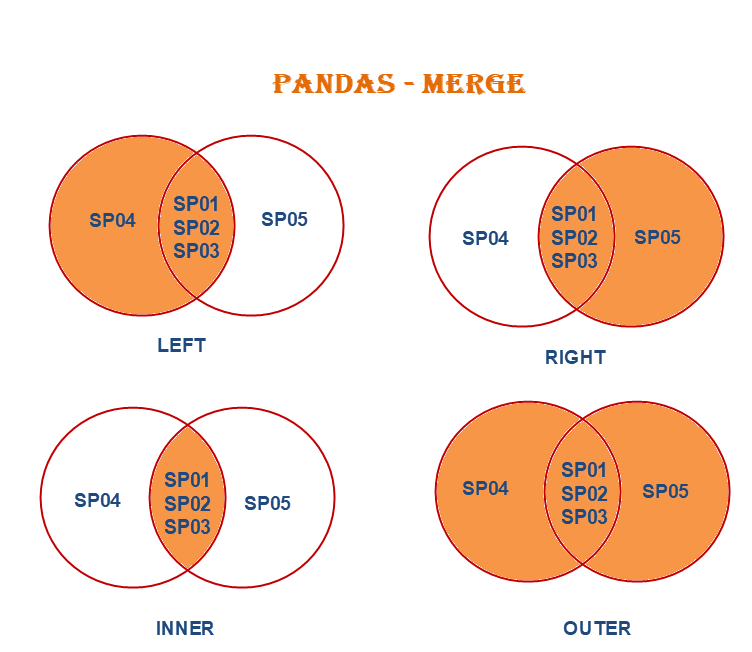

In [38]:
astros = tabla1.copy()
planetas = tabla2.copy()

In [39]:
astros["Id"] = ["Sol", "Luna", "Marte", "Júpiter", "Venus"]
planetas["Id"] = ["Mercurio", "Venus", "Marte", "Júpiter", "Saturno"]

In [40]:
tabla1

,Col1,Col2,Col3,Col4,Col5
a,1.0,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0,1.0
e,1.0,1.0,1.0,1.0,1.0


In [42]:
display(astros, planetas)

,Col1,Col2,Col3,Col4,Col5,Id
a,1.0,1.0,1.0,1.0,1.0,Sol
b,1.0,1.0,1.0,1.0,1.0,Luna
c,1.0,1.0,1.0,1.0,1.0,Marte
d,1.0,1.0,1.0,1.0,1.0,Júpiter
e,1.0,1.0,1.0,1.0,1.0,Venus


,Col1,Col2,Col3,Col5,Col6,Id
a,2.0,2.0,2.0,2.0,2.0,Mercurio
b,2.0,2.0,2.0,2.0,2.0,Venus
c,2.0,2.0,2.0,2.0,2.0,Marte
e,2.0,2.0,2.0,2.0,2.0,Júpiter
f,2.0,2.0,2.0,2.0,2.0,Saturno


In [23]:
pd.merge(astros, planetas, on=['Id'])

,Col1_x,Col2_x,Col3_x,Col4,Col5_x,Id,Col1_y,Col2_y,Col3_y,Col5_y,Col6
0,1.0,1.0,1.0,1.0,1.0,Marte,2.0,2.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,Júpiter,2.0,2.0,2.0,2.0,2.0
2,1.0,1.0,1.0,1.0,1.0,Venus,2.0,2.0,2.0,2.0,2.0


Observamos que ha reseteado el `index`

## Con varias columnas clave

Es posible usar más de una columna clave

In [24]:
tablaA = pd.DataFrame({
    'Nombre': [  'Juan',  'Ana',    'Luis',      'Sofía',    'Miguel'],
    'Apellido': ['Pérez', 'García', 'Fernández', 'Martínez', 'López'],
    'Ciudad':   ['Bilbao', 'Madrid', 'Valencia', 'Sevilla', 'Barcelona']
})

# Definimos el segundo DataFrame, tablaB
tablaB = pd.DataFrame({
    'Nombre':   ['Ana',    'Luis',      'Carlos',  'Laura', 'Miguel'],
    'Apellido': ['García', 'Fernández', 'Ramírez', 'Díaz',  'López'],
    'Edad': [25, 55, 36, 48, 13]
})

In [25]:
pd.merge(tablaA, tablaB, on=['Nombre', "Apellido"], how = "outer")

,Nombre,Apellido,Ciudad,Edad
0,Ana,García,Madrid,25.0
1,Carlos,Ramírez,NaN,36.0
2,Juan,Pérez,Bilbao,NaN
3,Laura,Díaz,NaN,48.0
4,Luis,Fernández,Valencia,55.0
5,Miguel,López,Barcelona,13.0
6,Sofía,Martínez,Sevilla,NaN


Aquí el valor por defecto es `inner`. Si queremos otro comportamiento hemos de usar `outer` `left` o `right`

In [26]:
pd.merge(astros, planetas, on=['Id'], how = "outer")

,Col1_x,Col2_x,Col3_x,Col4,Col5_x,Id,Col1_y,Col2_y,Col3_y,Col5_y,Col6
0,1.0,1.0,1.0,1.0,1.0,Júpiter,2.0,2.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,Luna,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,Marte,2.0,2.0,2.0,2.0,2.0
3,NaN,NaN,NaN,NaN,NaN,Mercurio,2.0,2.0,2.0,2.0,2.0
4,NaN,NaN,NaN,NaN,NaN,Saturno,2.0,2.0,2.0,2.0,2.0
5,1.0,1.0,1.0,1.0,1.0,Sol,NaN,NaN,NaN,NaN,NaN
6,1.0,1.0,1.0,1.0,1.0,Venus,2.0,2.0,2.0,2.0,2.0


In [27]:
pd.merge(astros, planetas, on=['Id'], how = "left")

,Col1_x,Col2_x,Col3_x,Col4,Col5_x,Id,Col1_y,Col2_y,Col3_y,Col5_y,Col6
0,1.0,1.0,1.0,1.0,1.0,Sol,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,Luna,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,Marte,2.0,2.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,1.0,Júpiter,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,1.0,1.0,1.0,Venus,2.0,2.0,2.0,2.0,2.0


In [28]:
pd.merge(astros, planetas, on=['Id'], how = "right")

,Col1_x,Col2_x,Col3_x,Col4,Col5_x,Id,Col1_y,Col2_y,Col3_y,Col5_y,Col6
0,NaN,NaN,NaN,NaN,NaN,Mercurio,2.0,2.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,Venus,2.0,2.0,2.0,2.0,2.0
2,1.0,1.0,1.0,1.0,1.0,Marte,2.0,2.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,1.0,Júpiter,2.0,2.0,2.0,2.0,2.0
4,NaN,NaN,NaN,NaN,NaN,Saturno,2.0,2.0,2.0,2.0,2.0


## Para renombrar las columnas

In [29]:
combinacion = pd.merge(astros, planetas,  on=['Id'])

nuevos_nombres = {'Col1_y': 'Col1_tabla2', 'Col2_y': 'Col2_tabla2', 'Col3_y':'Col3_tabla2', 'Col5_y':'Col5_tabla2'}

combinacion2 = combinacion.rename(columns=nuevos_nombres)
combinacion2

,Col1_x,Col2_x,Col3_x,Col4,Col5_x,Id,Col1_tabla2,Col2_tabla2,Col3_tabla2,Col5_tabla2,Col6
0,1.0,1.0,1.0,1.0,1.0,Marte,2.0,2.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,Júpiter,2.0,2.0,2.0,2.0,2.0
2,1.0,1.0,1.0,1.0,1.0,Venus,2.0,2.0,2.0,2.0,2.0


# Join

`join`  difiere de `concat` en su sintaxis. El funcionamiento es similar.

Evita que existan columnas repetidas forzando que le agreguemos un sufijo a las que haya.

In [30]:
# Si hay columnas repetidas esto nos dará un error
# tabla1.join(tabla2)

In [31]:
tabla1.join(tabla2, rsuffix='_right')

,Col1,Col2,Col3,Col4,Col5,Col1_right,Col2_right,Col3_right,Col5_right,Col6
a,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
b,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
c,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
d,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
e,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


También es posible especificar diferentes tipos de uniones usando el parámetro `how`. Los valores posibles son:
- `'left'` (por defecto): Usa las claves del DataFrame llamante.
- `'right'`: Usa las claves del DataFrame pasado como argumento.
- `'outer'`: Usa la unión de las claves de ambos DataFrames.
- `'inner'`: Usa la intersección de las claves de ambos DataFrames.

In [32]:
# podemos incluir los comunes y los no comunes.
#tabla1.join(tabla2, how='outer', rsuffix='_right')

# O solo los comunes.
#tabla1.join(tabla2, how='inner', rsuffix='_right')

# O Que mande la primera tabla.
#tabla1.join(tabla2, how='left', rsuffix='_right')

# O la segunda
tabla1.join(tabla2, how='right', rsuffix='_right')

,Col1,Col2,Col3,Col4,Col5,Col1_right,Col2_right,Col3_right,Col5_right,Col6
a,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
b,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
c,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
e,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
f,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0
